## Step 1.1, Loading our Data

In [1]:
import pandas as pd

# after importing the pandas library, a library that is good for large scale algebra and data manipulation
# we gather our data into the data variable in the form a pandas dataframe
data = pd.read_csv('patient_priority.csv')# our data has an index column
data.describe() # shows some basic statistics about our data

,Unnamed: 0,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease
count,6962.000000,6962.000000,6961.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000
mean,2011.954180,57.450014,0.531964,0.529015,109.629991,184.711290,163.502442,0.061764,98.394283,56.813416,111.091640,27.190908,0.467386,0.071531,0.039500
std,1560.966466,11.904948,0.499013,1.253791,21.534852,32.010359,15.458693,0.240743,28.598084,22.889316,17.470033,7.362886,0.102663,0.257729,0.194796
min,0.000000,28.000000,0.000000,0.000000,60.000000,150.000000,138.000000,0.000000,55.120000,21.000000,81.000000,10.300000,0.078000,0.000000,0.000000
25%,604.000000,48.000000,0.000000,0.000000,92.000000,164.000000,150.000000,0.000000,78.707500,36.000000,97.000000,21.800000,0.467386,0.000000,0.000000
50%,1628.500000,56.000000,1.000000,0.000000,111.000000,179.000000,163.000000,0.000000,93.000000,55.000000,111.000000,26.200000,0.467386,0.000000,0.000000
75%,3368.750000,66.000000,1.000000,0.000000,127.000000,192.000000,177.000000,0.000000,111.632500,77.000000,125.000000,31.000000,0.467386,0.000000,0.000000
max,5109.000000,82.000000,1.000000,4.000000,165.000000,294.000000,202.000000,1.000000,199.000000,99.000000,171.000000,66.800000,2.420000,1.000000,1.000000


Well, a quick look at our data shows it is definitely some preliminary medical information.
<br>We have a few binary labels, some indicating heart disease or hypertension
<br> Diabetes pedigree is how likely an individual is to have diabetes based on family history
<br><br>
We have an unnamed column. That is a previous index. We can fix this when loading data but I am going to just drop the column this time

## Step 1.2, Cleaning our data

In [2]:
data = data.drop('Unnamed: 0', axis=1)# setting the drop function to entire column

In [3]:
# first lets remove our labels from the data
triage = data['triage']
data = data.drop('triage', axis=1)

In [4]:
# we should not have any null values but let's check what kind of variables our dataset
# will contain
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6962 entries, 0 to 6961
Data columns (total 16 columns):
age                  6962 non-null float64
gender               6961 non-null float64
chest pain type      6962 non-null float64
blood pressure       6962 non-null float64
cholesterol          6962 non-null float64
max heart rate       6962 non-null float64
exercise angina      6962 non-null float64
plasma glucose       6962 non-null float64
skin_thickness       6962 non-null float64
insulin              6962 non-null float64
bmi                  6962 non-null float64
diabetes_pedigree    6962 non-null float64
hypertension         6962 non-null float64
heart_disease        6962 non-null float64
Residence_type       6962 non-null object
smoking_status       6962 non-null object
dtypes: float64(14), object(2)
memory usage: 870.3+ KB


We have a few different objects in our dataset along with our numerical data. Triage will be our target for this model. Triage represents the level of immediate care a patient requires upon assessment. 
<br>We'll want to check for some null values and if there are duplicates now

In [5]:
# built in function that returns a list of booleans for each row, showing true if a null if contained
if data.isnull().any: #.any just returns true if any value is True
    print('There are Null values')

# another built-in function that returns a list of booleans that shows true if there are repeating rows
dups = data.duplicated()
if dups.any():
    print('There are duplicates')

There are Null values


We assumed there would be no duplicates initially but always safe to check
<br>Well, I guess a hunting for these null values we shall go!

In [6]:
# Lets find what rows have nulls
print(data.loc[data.isnull().any(axis=1)])
#this is a cool trick to find all rows with a null and print them out
# we iterate through the dataframe, finding the Null values via booleans
# then having any(axis=1) prints out the entire row

       age  gender  chest pain type  blood pressure  cholesterol  \
4968  72.0     NaN              0.0            85.0        160.0   

      max heart rate  exercise angina  plasma glucose  skin_thickness  \
4968           178.0              0.0          143.33            87.0   

      insulin   bmi  diabetes_pedigree  hypertension  heart_disease  \
4968    116.0  22.4           0.467386           0.0            0.0   

     Residence_type   smoking_status  
4968          Rural  formerly smoked  


Huh. A single row is missing a gender value. Is it controversial to drop this? 
<br>Gender is just specified via 0 or 1. This likely represents the binary values of male or female
(with no indication of which is qhich to ensure indivdual privacy)
<br>After some thought it is likely best to drop this point. It is a single point, if we had more it would be better to add another gender classification of 2. Altering the data, like randomly allocating a gender value
 is risky due to the domain of this data (medicine/healthcare)

In [7]:
# dropping the null value and checking to ensure operatin succeeded
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6961 entries, 0 to 6961
Data columns (total 16 columns):
age                  6961 non-null float64
gender               6961 non-null float64
chest pain type      6961 non-null float64
blood pressure       6961 non-null float64
cholesterol          6961 non-null float64
max heart rate       6961 non-null float64
exercise angina      6961 non-null float64
plasma glucose       6961 non-null float64
skin_thickness       6961 non-null float64
insulin              6961 non-null float64
bmi                  6961 non-null float64
diabetes_pedigree    6961 non-null float64
hypertension         6961 non-null float64
heart_disease        6961 non-null float64
Residence_type       6961 non-null object
smoking_status       6961 non-null object
dtypes: float64(14), object(2)
memory usage: 924.5+ KB


In [8]:
# we need to one-hot-encode our other columns
# this is a process of converting categorical data to numerical

#storing the encoded data in a new dataframe
encoded = pd.get_dummies(data, columns=['Residence_type', 'smoking_status'])

In [9]:
# looking at our new dataframe
encoded.info() # is this good enough? Let's FIND OUT!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6961 entries, 0 to 6961
Data columns (total 20 columns):
age                               6961 non-null float64
gender                            6961 non-null float64
chest pain type                   6961 non-null float64
blood pressure                    6961 non-null float64
cholesterol                       6961 non-null float64
max heart rate                    6961 non-null float64
exercise angina                   6961 non-null float64
plasma glucose                    6961 non-null float64
skin_thickness                    6961 non-null float64
insulin                           6961 non-null float64
bmi                               6961 non-null float64
diabetes_pedigree                 6961 non-null float64
hypertension                      6961 non-null float64
heart_disease                     6961 non-null float64
Residence_type_Rural              6961 non-null uint8
Residence_type_Urban              6961 non-null uint8
s

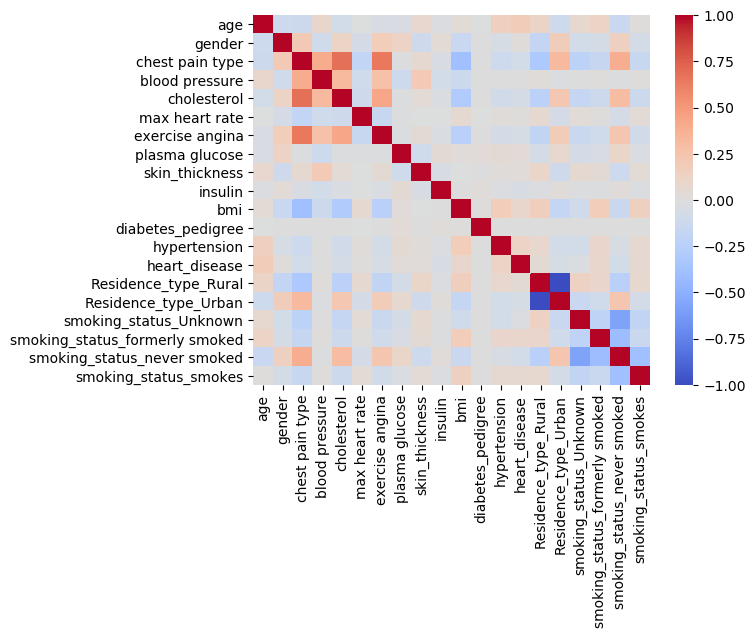

<Figure size 10000x10000 with 0 Axes>

In [10]:
import seaborn as sb
import matplotlib.pyplot as plt

# generating a heatmap using a correlation matrix generated via Pandas
sb.heatmap(encoded.corr(), cmap="coolwarm")
plt.figure(figsize=(100,100))
plt.show()

In [11]:
# generating a pairplot to see a better representation of these patterns
#sb.pairplot(data) # commented out for timesaving purposes
#plt.show() # saved original image to local disk. Final version will contain image

![Pairplot](pairplot_assign3.png)

## Step 2.1, Scaling our data

In [12]:
from sklearn.preprocessing import MinMaxScaler

#scaling our data with the sklearn MinMaxScaler
# This will turn all datapoints to a value between 0 and 1
scaler = MinMaxScaler() #Initializing our scaler
scaled_data = scaler.fit_transform(encoded) # this takes our encoded data and transforms it
# while learning the pattern it needs to follow to scale the data
# it learns the mean, standard deviation and parameters it will transform
# Thus fit_transform

## Step 2.2, Modelling our data

### Danton's Contributions